<a href="https://colab.research.google.com/github/dealbujav/CE888/blob/master/bank_classification_(lab_4).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("https://raw.githubusercontent.com/albanda/CE888/master/lab4/bank-additional-full.csv", delimiter = ";")
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [2]:
print(df.columns)

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')


In [0]:
#Dropping na values
df = df.dropna()

In [4]:
#Convert categorical variables to dummies variables
df_dummies = pd.get_dummies(df)
df_dummies.copy

<bound method NDFrame.copy of        age  duration  campaign  ...  poutcome_success  y_no  y_yes
0       56       261         1  ...                 0     1      0
1       57       149         1  ...                 0     1      0
2       37       226         1  ...                 0     1      0
3       40       151         1  ...                 0     1      0
4       56       307         1  ...                 0     1      0
...    ...       ...       ...  ...               ...   ...    ...
41183   73       334         1  ...                 0     0      1
41184   46       383         1  ...                 0     1      0
41185   56       189         2  ...                 0     1      0
41186   44       442         1  ...                 0     0      1
41187   74       239         3  ...                 0     1      0

[41188 rows x 65 columns]>

In [0]:
#Delete columns "duration"
del df_dummies["duration"]

In [0]:
#Delete columns "duration"
del df_dummies["y_no"]

(array([36548.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  4640.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

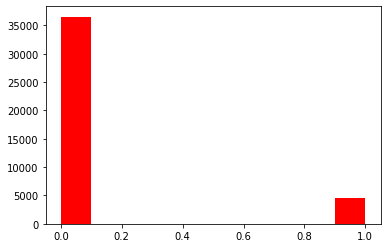

In [7]:
#Plot histogram of column "y_yes"
import matplotlib.pyplot as plt
x = df_dummies["y_yes"]
plt.hist(x, color='r')

In [0]:
#Split into training and test set
from sklearn.model_selection import train_test_split
train, test = train_test_split(df_dummies,test_size = 0.3, random_state=42)

In [0]:
#Separte feature values from target values (training set)
X_train = train.iloc[:,:-1]
y_train = train.iloc[:,62]

In [0]:
#Separte feature values from target values (test set)
X_test = test.iloc[:,:-1]
y_test = test.iloc[:,62]

In [0]:
#Build classifier ExtraTreesClassifier and do cross validation
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score as acc

clf = ExtraTreesClassifier(n_estimators=100)
#clf.fit(X_train, y_train)

dummy_clf = DummyClassifier(strategy='stratified')

scores = cross_val_score(clf, X_train, y_train, cv=10, scoring=make_scorer(acc))
dummy_scores = cross_val_score(dummy_clf,X_train, y_train, cv=10, scoring=make_scorer(acc))

In [12]:
#Knowing the results

print("Accuracy: %0.8f +/- %0.8f" % (scores.mean(), scores.std()))
print("Dummy Accuracy: %0.8f +/- %0.8f" % (dummy_scores.mean(), dummy_scores.std()))

Accuracy: 0.88082284 +/- 0.00264642
Dummy Accuracy: 0.80229619 +/- 0.00504136


In [13]:
#Fitting the training model
clf.fit(X_train,y_train)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [0]:
#Fitting the testing model
y_pred = clf.predict(X_test)

In [0]:
features = X_train.columns

Feature ranking:
1. age (0.147692)
2. euribor3m (0.097739)
3. campaign (0.097319)
4. nr.employed (0.039731)
5. pdays (0.035319)
6. poutcome_success (0.028108)
7. emp.var.rate (0.025309)
8. housing_no (0.020855)
9. housing_yes (0.020359)
10. job_admin. (0.018019)
11. marital_married (0.018018)
12. cons.conf.idx (0.016677)
13. marital_single (0.016235)
14. education_high.school (0.016206)
15. day_of_week_thu (0.015742)
16. education_university.degree (0.015731)
17. cons.price.idx (0.015523)
18. day_of_week_mon (0.015518)
19. day_of_week_wed (0.015444)
20. day_of_week_tue (0.015340)
21. day_of_week_fri (0.015032)
22. job_technician (0.014805)
23. loan_no (0.014749)
24. loan_yes (0.014138)
25. month_may (0.012659)
26. previous (0.011658)
27. education_professional.course (0.011633)
28. marital_divorced (0.011509)
29. job_blue-collar (0.011271)
30. education_basic.9y (0.011125)
31. poutcome_nonexistent (0.010125)
32. job_management (0.009341)
33. job_services (0.009142)
34. contact_cellular

(0, 0.16082462052196575)

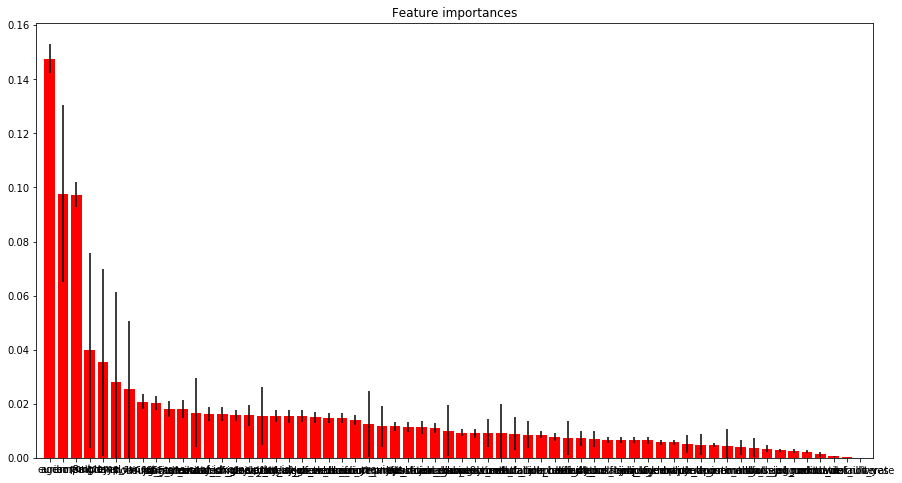

In [16]:
#Get sample importnaces

importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0) 
indices = np.argsort(importances)[::-1]

print("Feature ranking:") 
for f in range(X_train.shape[1]):
  print("%d. %s (%f)" % (f + 1, features[indices[f]], importances[indices[f]]))

# Plot the feature importances of the forest
fig = plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices], color="r", yerr=std[indices], align="center") 
plt.xticks(range(X_train.shape[1]), np.array(features)[indices])
plt.xlim([-1, X_train.shape[1]])
fig.set_size_inches(15, 8)
axes = plt.gca()
axes.set_ylim([0, None])


In [0]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        t = "(%.2f)"%(cm[i, j])
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Normalized confusion matrix


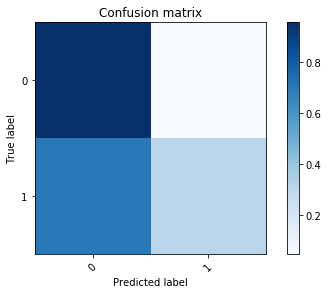

In [18]:
# Compute confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

#y_pred = clf.predict(X_train)
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=range(len(set(y_test))), normalize = True, title='Confusion matrix')